In [2]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.0 MB/s eta 0:00:00a 0:00:01m


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
import numpy as np

## Effect of Depth on Accuracy

In [63]:
pt = './ref/accuracy_with_depth_1.csv'
df = pd.read_csv(pt)
df

,#,Model,Arch,NumEpochs,TrainingTime,TrainingTimePerEpoch,InferenceLatency,Accuracy,Flops,Parameters
0,1,MLP,Input(784)-Hidden(512)-Output(10),2,4.52,2.26,0.0057,0.960,813056,407050
1,2,MLP,Input(784)-Hidden(512)-Hidden(512)-Output(10),2,4.83,2.41,0.0061,0.963,1337344,669706
2,3,MLP,Input(784)-Hidden(512)-Hidden(512)-Hidden(512)...,2,5.30,2.65,0.0062,0.964,1861632,932362


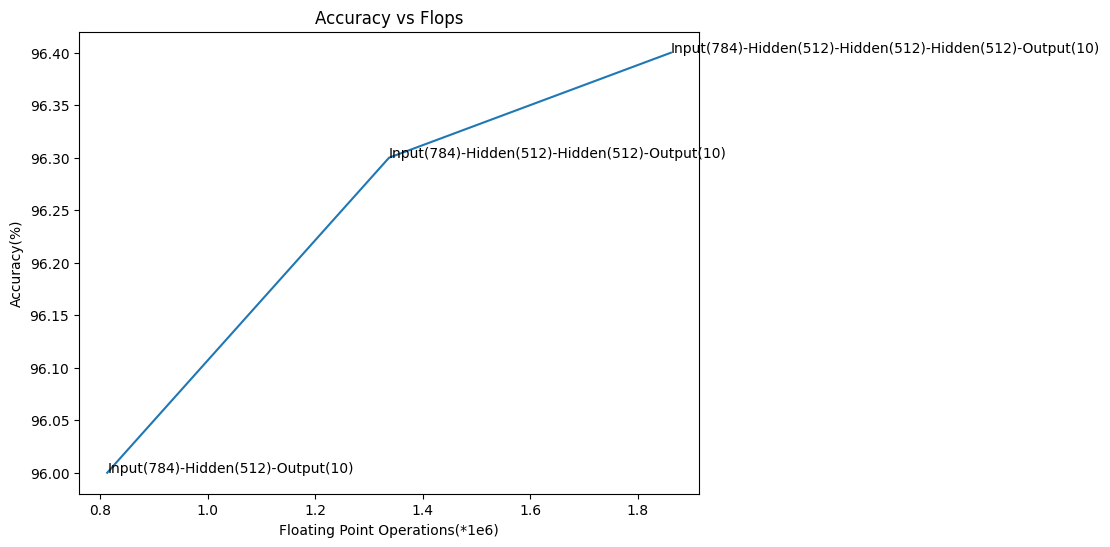

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.plot(df['Flops']/1e6,df['Accuracy']*100)
plt.title('Accuracy vs Flops')
plt.xlabel('Floating Point Operations(*1e6)')
plt.ylabel('Accuracy(%)')
for i,row in df.iterrows():
    ax.annotate(row['Arch'],(row['Flops']/1e6,row['Accuracy']*100),(row['Flops']/1e6,row['Accuracy']*100))
plt.show()

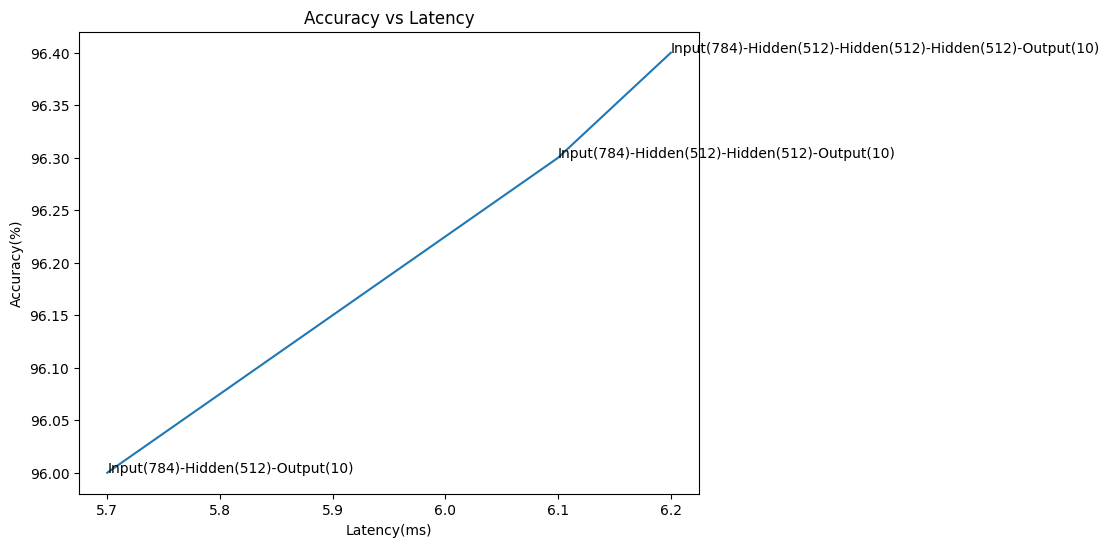

In [73]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.plot(df['InferenceLatency']*1000,df['Accuracy']*100)
plt.title('Accuracy vs Latency')
plt.xlabel('Latency(ms)')
plt.ylabel('Accuracy(%)')
for i,row in df.iterrows():
    ax.annotate(row['Arch'],(row['InferenceLatency']*1000,row['Accuracy']*100),(row['InferenceLatency']*1000,row['Accuracy']*100))
plt.show()

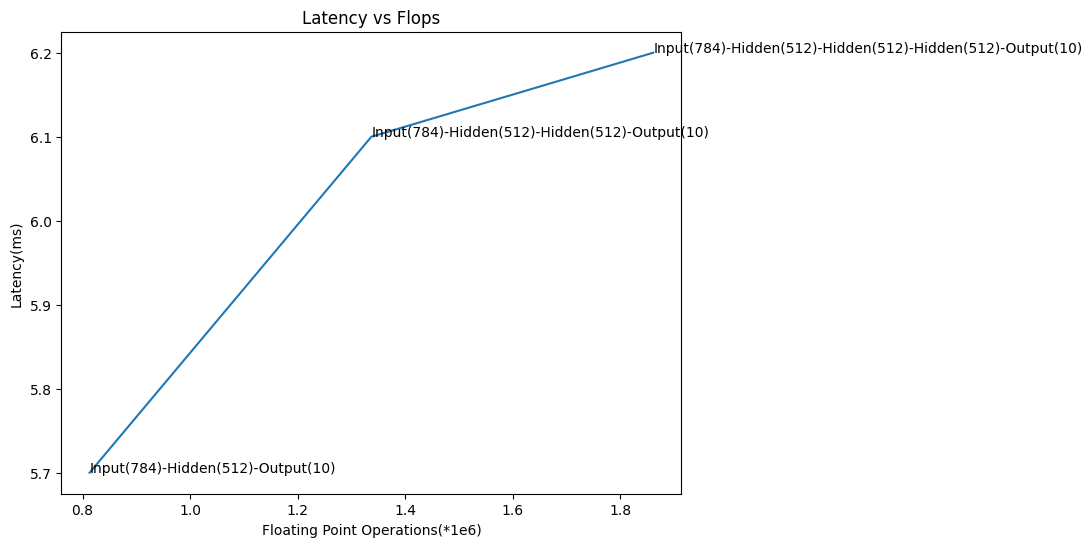

In [75]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.plot(df['Flops']/1e6,df['InferenceLatency']*1000)
plt.title('Latency vs Flops')
plt.xlabel('Floating Point Operations(*1e6)')
plt.ylabel('Latency(ms)')
for i,row in df.iterrows():
    ax.annotate(row['Arch'],(row['Flops']/1e6,row['InferenceLatency']*1000),(row['Flops']/1e6,row['InferenceLatency']*1000))
plt.show()

## Effect of Width on Accuracy

In [76]:
pt = './ref/accuracy_with_width.csv'
df = pd.read_csv(pt)
df

,#,Model,Arch,NumEpoch,TrainingTime,TrainingTimeperEpoch,InferenceLatency,Accuracy,Flops,Parameter
0,1,MLP,Input(784)-Hidden(128)-Output(10),2,3.93,1.97,0.0053,0.937,203264,101770
1,2,MLP,Input(784)-Hidden(256)-Output(10),2,4.15,2.08,0.0055,0.958,406528,203530
2,3,MLP,Input(784)-Hidden(512)-Output(10),2,4.52,2.26,0.0060,0.962,813056,407050
3,4,MLP,Input(784)-Hidden(1024)-Output(10),2,4.96,2.48,0.0062,0.967,1626112,814090


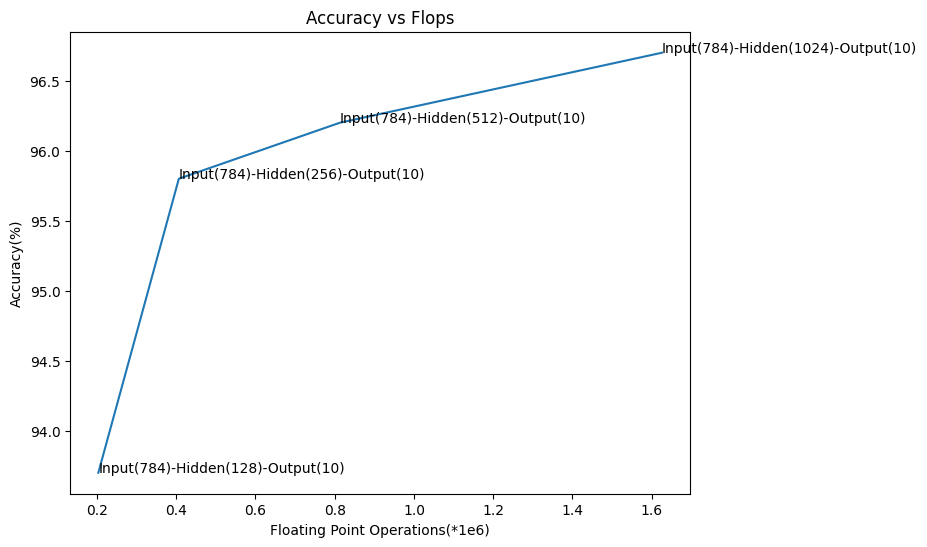

In [77]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.plot(df['Flops']/1e6,df['Accuracy']*100)
plt.title('Accuracy vs Flops')
plt.xlabel('Floating Point Operations(*1e6)')
plt.ylabel('Accuracy(%)')
for i,row in df.iterrows():
    ax.annotate(row['Arch'],(row['Flops']/1e6,row['Accuracy']*100),(row['Flops']/1e6,row['Accuracy']*100))
plt.show()

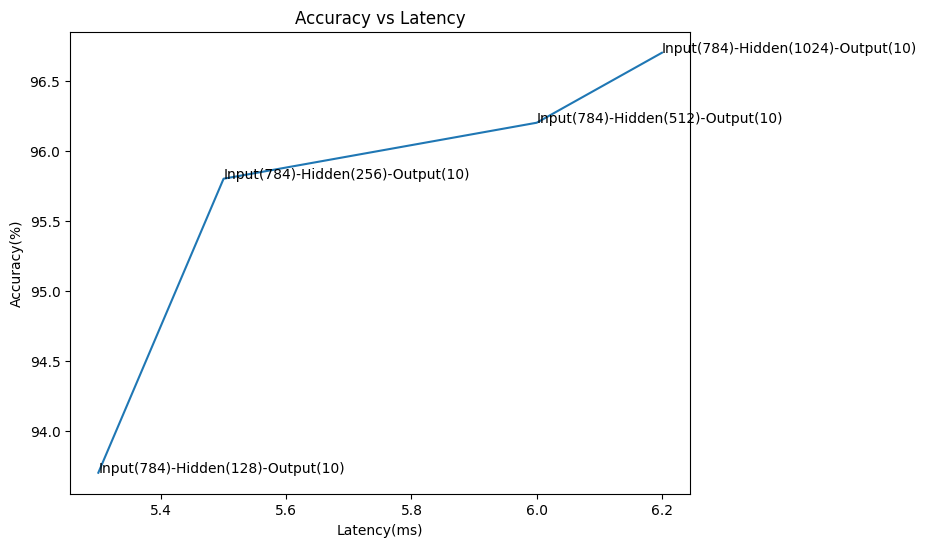

In [78]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.plot(df['InferenceLatency']*1000,df['Accuracy']*100)
plt.title('Accuracy vs Latency')
plt.xlabel('Latency(ms)')
plt.ylabel('Accuracy(%)')
for i,row in df.iterrows():
    ax.annotate(row['Arch'],(row['InferenceLatency']*1000,row['Accuracy']*100),(row['InferenceLatency']*1000,row['Accuracy']*100))
plt.show()

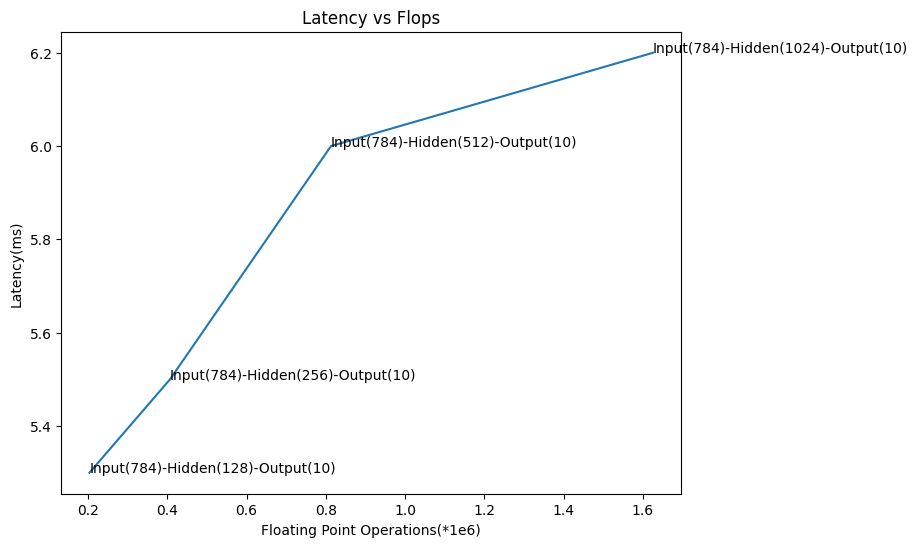

In [79]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.plot(df['Flops']/1e6,df['InferenceLatency']*1000)
plt.title('Latency vs Flops')
plt.xlabel('Floating Point Operations(*1e6)')
plt.ylabel('Latency(ms)')
for i,row in df.iterrows():
    ax.annotate(row['Arch'],(row['Flops']/1e6,row['InferenceLatency']*1000),(row['Flops']/1e6,row['InferenceLatency']*1000))
plt.show()